## Two dimensional UMAP representations of the alloy compostitons (Experimental as well as Suggested)


In [1]:
import pandas as pd
import numpy as np

### UMAP representation for UTS

In [2]:
df_all = pd.read_csv('data/EI_UMaP/Nballoy_UTS_all.csv')


In [3]:
df_all_features = df_all[['formula','temp','UTS_Mpa']]
df_all_features.columns = ['formula','T','target']
df_all_features

,formula,T,target
0,Nb99.0Zr1.0,24,330.960000
1,Nb94.9Zr5.1,16,523.790000
2,Nb91.2V8.8,24,535.050000
3,Nb92.0Hf5.4Ti2.0Zr0.5,24,405.430000
4,Nb88.7Ta5.7W5.6,24,517.130000
5,Nb74.9Ta17.7W6.2Zr1.3,24,599.180000
6,Nb79.3Ta19.5Zr1.2,27,606.870000
7,Nb77.6Ti17.7Zr4.7,22,554.620000
8,Nb72.8C0.7Mo8.8Ti17.7,24,637.790000
9,Nb96.4W2.6Zr1.0,24,584.010000


### Featurization 

In [10]:
from cbfv.composition import generate_features
X_feature_all, y_all, formulae_exp, skipped_exp= generate_features(df_all_features,elem_prop='f3_revised',drop_duplicates=False,extend_features=False)

# X_feature_all

Processing Input Data: 100%|██████████████████| 31/31 [00:00<00:00, 8345.00it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████████████| 31/31 [00:00<00:00, 9163.68it/s]

	Creating Pandas Objects...


In [11]:
#print(X_train_unscaled.columns)
from sklearn.preprocessing import StandardScaler
total_columns = int((X_feature_all.shape[1])/3) 
X_featue_all_avg = X_feature_all.iloc[:,0:total_columns]



scaler = StandardScaler()
X_featue_all_avg_scaled = scaler.fit_transform(X_featue_all_avg)


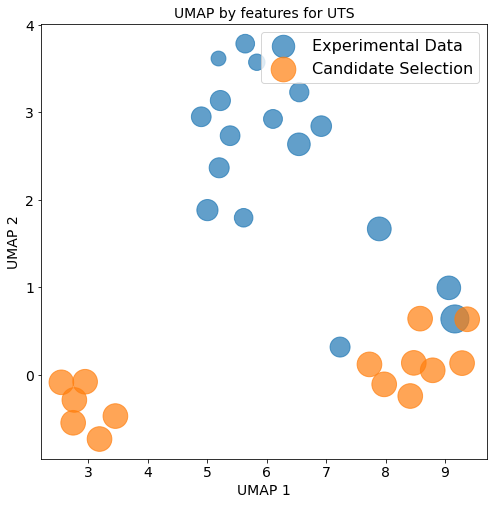

array([8.582308  , 0.64392585], dtype=float32)

In [12]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

reducer = umap.UMAP(random_state=56, n_neighbors =7)
ar_umap=reducer.fit_transform(X_featue_all_avg_scaled)
ar_umap
plt.figure(figsize=(8,8))
plt.scatter(ar_umap[0:17:,0],ar_umap[:17,1],label='Experimental Data', s=df_all['UTS_Mpa'][:17]/1.5, alpha=.7)
plt.scatter(ar_umap[17:31,0],ar_umap[17:31,1],label='Candidate Selection',s=df_all['UTS_Mpa'][17:31]/1.5,alpha=.7)
plt.legend(prop={'size': 16})
plt.xlabel('UMAP 1',size=14)
plt.ylabel('UMAP 2',size=14)

plt.title("UMAP by features for UTS",size=14)


# for k, v in pd.DataFrame(ar_umap).iterrows():
#     plt.annotate(k, v)

plt.tick_params(labelsize=14)
plt.show()
df_all_features.iloc[17]

ar_umap[17]     